In [1]:
import pandas as pd

In [2]:
# 사전투표일 : 2020년 4월 10일 ~ 2020년 4월 11일 오전 6시 ~ 오후 6시
# 투표일 : 2020년 4월 15일 오전 6시 ~ 오후 6시

## 국회의원 (National Council Memeber / ncm)
raw_ncm_21 = pd.read_csv("./1st_preproc_data/국회의원_21.csv", index_col=0)

In [3]:
theme_df = raw_ncm_21.loc[:, ["loc_1", "loc_2", "loc_3", "선거구명"]].copy()
theme_df.rename(columns={"선거구명": "theme"}, inplace=True)
theme_df = theme_df.reset_index(drop=True)
theme_df

,loc_1,loc_2,loc_3,theme
0,전라남도,곡성군,곡성읍,순천시광양시곡성군구례군을
1,전라남도,곡성군,오곡면,순천시광양시곡성군구례군을
2,전라남도,곡성군,삼기면,순천시광양시곡성군구례군을
3,전라남도,곡성군,석곡면,순천시광양시곡성군구례군을
4,전라남도,곡성군,목사동면,순천시광양시곡성군구례군을
...,...,...,...,...
3480,경상북도,영덕군,지품면,군위군의성군청송군영덕군
3481,경상북도,영덕군,축산면,군위군의성군청송군영덕군
3482,경상북도,영덕군,영해면,군위군의성군청송군영덕군
3483,경상북도,영덕군,병곡면,군위군의성군청송군영덕군


In [12]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'AppleGothic'

In [18]:
import seaborn as sns

In [14]:
df = (
    theme_df.loc[:, ["loc_1", "theme"]]
    .drop_duplicates()
    .groupby("loc_1")
    .size()
    .sort_values(ascending=False)
    .to_frame()
)

In [17]:
df.columns = ["갯수"]
df.index.name = '지역'

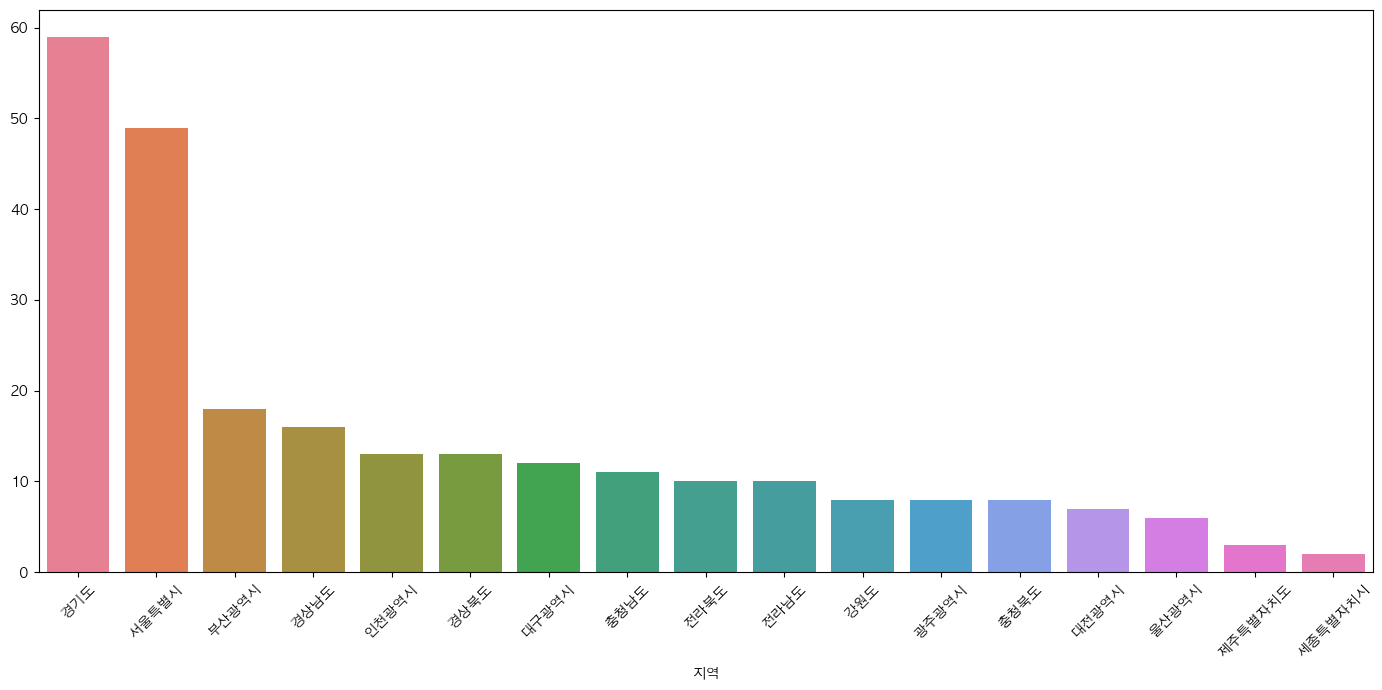

In [25]:
plt.figure(figsize=(14, 7))
sns.barplot(df.T)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [11]:
theme_df.to_csv("./2nd_preproc_data/theme_df.csv")